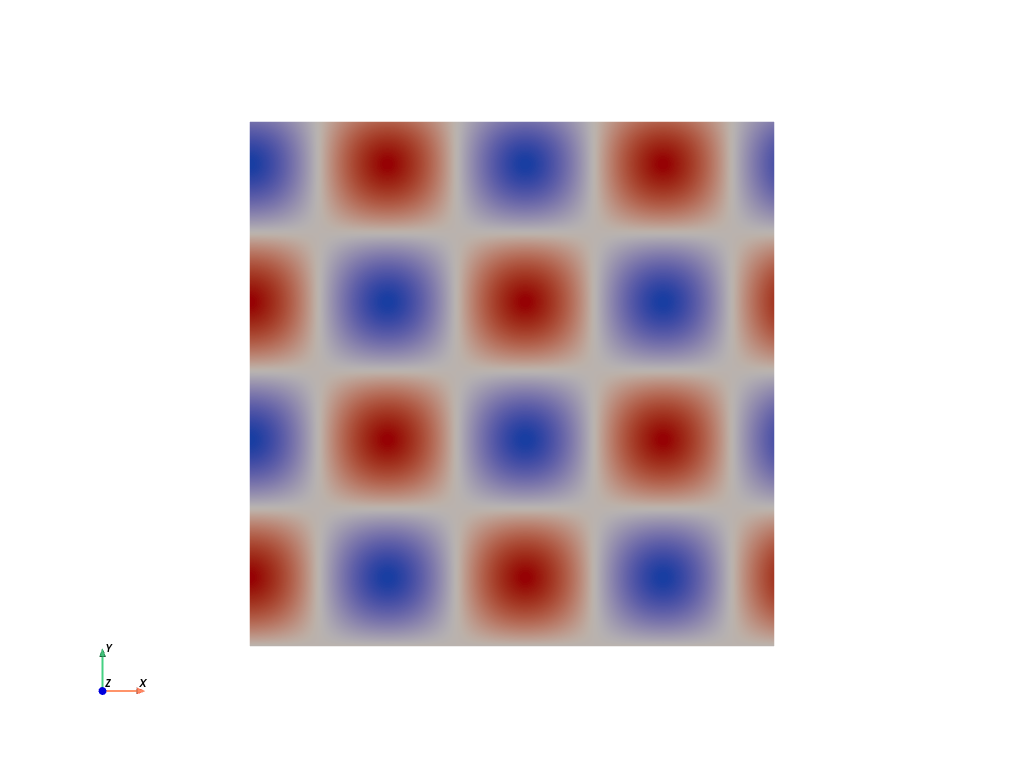

In [1]:
import pyvista as pv
pv.set_plot_theme('document')
pv.set_jupyter_backend('static')
import numpy as np
xi = np.arange(300)
x, y = np.meshgrid(xi, xi)
values = 127.5 + (1.0 + np.sin(x/25.0)*np.cos(y/25.0))
grid = pv.UniformGrid(dims=(300, 300, 1))
grid.point_data["values"] = values.flatten(order="F")
grid.plot(cpos='xy', show_scalar_bar=False, cmap='coolwarm')

In [2]:
>>> import vtk
>>> vtk_array = vtk.vtkDoubleArray()
>>> vtk_array.SetNumberOfComponents(3)
>>> vtk_array.SetNumberOfValues(9)
>>> vtk_array.SetValue(0, 0)
>>> vtk_array.SetValue(1, 0)
>>> vtk_array.SetValue(2, 0)
>>> vtk_array.SetValue(3, 1)
>>> vtk_array.SetValue(4, 0)
>>> vtk_array.SetValue(5, 0)
>>> vtk_array.SetValue(6, 0.5)
>>> vtk_array.SetValue(7, 0.667)
>>> vtk_array.SetValue(8, 0)
>>> vtk_points = vtk.vtkPoints()
>>> vtk_points.SetData(vtk_array)
>>> print(vtk_points)

vtkPoints (0x561a725f7da0)
  Debug: Off
  Modified Time: 8758
  Reference Count: 1
  Registered Events: (none)
  Data: 0x561a712a9ed0
  Data Array Name: Points
  Number Of Points: 3
  Bounds: 
    Xmin,Xmax: (0, 1)
    Ymin,Ymax: (0, 0.667)
    Zmin,Zmax: (0, 0)




In [3]:
>>> import numpy as np
>>> np_points = np.array([[0, 0, 0],
...                       [1, 0, 0],
...                       [0.5, 0.667, 0]])

In [4]:
>>> import pyvista as pv
>>> poly_data = pv.PolyData(np_points)

In [5]:
>>> vtk_poly_data = vtk.vtkPolyData()
>>> vtk_poly_data.SetPoints(vtk_points)

In [6]:
>>> cell_arr = vtk.vtkCellArray()
>>> cell_arr.InsertNextCell(3)
>>> cell_arr.InsertCellPoint(0)
>>> cell_arr.InsertCellPoint(1)
>>> cell_arr.InsertCellPoint(2)
>>> vtk_poly_data.SetPolys(cell_arr)

In [7]:
>>> faces = np.array([3, 0, 1, 2])
>>> poly_data = pv.PolyData(np_points, faces)
>>> poly_data.faces

array([3, 0, 1, 2])

In [8]:
# Configure for panel
import pyvista
pyvista.set_jupyter_backend('panel')
pyvista.global_theme.background = 'white'
pyvista.global_theme.axes.show = False
pyvista.global_theme.smooth_shading = True
pyvista.global_theme.antialiasing = True

In [9]:
import pyvista as pv

# create a default sphere and a shifted sphere
mesh_a = pv.Sphere()
mesh_b = pv.Sphere(center=(-0.4, 0, 0))
out, n_coll = mesh_a.collision(mesh_b, generate_scalars=True, contact_mode=2)

pl = pv.Plotter()
pl.add_mesh(out)
pl.add_mesh(mesh_b, style='wireframe', color='k')
pl.camera_position = 'xy'
pl.show()

In [10]:
import vtk
import pyvista as pv

# Create a circle using vtk
polygonSource = vtk.vtkRegularPolygonSource()
polygonSource.GeneratePolygonOff()
polygonSource.SetNumberOfSides(50)
polygonSource.SetRadius(5.0)
polygonSource.SetCenter(0.0, 0.0, 0.0)
polygonSource.Update()

# wrap and plot using pyvista
mesh = pv.wrap(polygonSource.GetOutput())
mesh.plot(line_width=3, cpos='xy', color='k')

In [11]:
import pyvista as pv
from pyvista import examples
import vtk

mesh = examples.download_bunny_coarse()

# Initialize VTK algorithm
splatter = vtk.vtkGaussianSplatter()

# Pass PyVista object as input to VTK
splatter.SetInputData(mesh)

# Set parameters
n = 200
splatter.SetSampleDimensions(n, n, n)
splatter.SetRadius(.02)
splatter.SetExponentFactor(-10)
splatter.SetEccentricity(2)
splatter.Update()

# Retrieve output and wrap with PyVista
vol = pv.wrap(splatter.GetOutput())

# Use PyVista to produce contours
cntrs = vol.contour([.95 * splatter.GetRadius()])

# Use PyVista to plot
p = pv.Plotter()
p.add_mesh(mesh, style='wireframe')
p.add_mesh(cntrs, color=True)
p.show()